### Initial Data Exploration

In [8]:
import pandas as pd
file_path = 'C:\\Users\\Talha\\Downloads\\Raw Edited.csv'
df = pd.read_csv(file_path, skiprows=[1])
df.head()


,Serial Number,Country,Site Name,Timestamp,Longitude,Latitude,is_indoors,PM1.0,PM2.5,Applied PM2.5 Custom Calibration Factor,...,PM1.0 NC,PM2.5 NC,PM4.0 NC,PM10 NC,Typical Particle Size,PM Sensor Status,Temperature,Relative Humidity,Device Status,Time Delta
0,81432130002,Pakistan,NUST-Pk3,12/06/2021 07:20,72.990168,33.648275,False,12,12,NaN,...,128,129,129,129,0.58,0,21.3,45,0,0
1,81432130002,Pakistan,NUST-Pk3,12/06/2021 07:35,72.990168,33.648275,False,12,13,NaN,...,133,134,134,134,0.59,0,22.0,43,0,15
2,81432130002,Pakistan,NUST-Pk3,12/06/2021 08:48,72.990168,33.648275,False,23,25,NaN,...,252,254,254,254,0.61,0,21.2,45,1,13
3,81432130002,Pakistan,NUST-Pk3,12/06/2021 09:03,72.990168,33.648275,False,20,21,NaN,...,220,221,222,222,0.60,0,22.5,41,0,15
4,81432130002,Pakistan,NUST-Pk3,12/06/2021 09:18,72.990168,33.648275,False,26,28,NaN,...,283,285,285,285,0.60,0,22.9,42,0,15


### Data Filtering and Transformation

In [12]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df_filtered = df[['Timestamp', 'PM2.5']].dropna()


### Calendar Plot for a Month

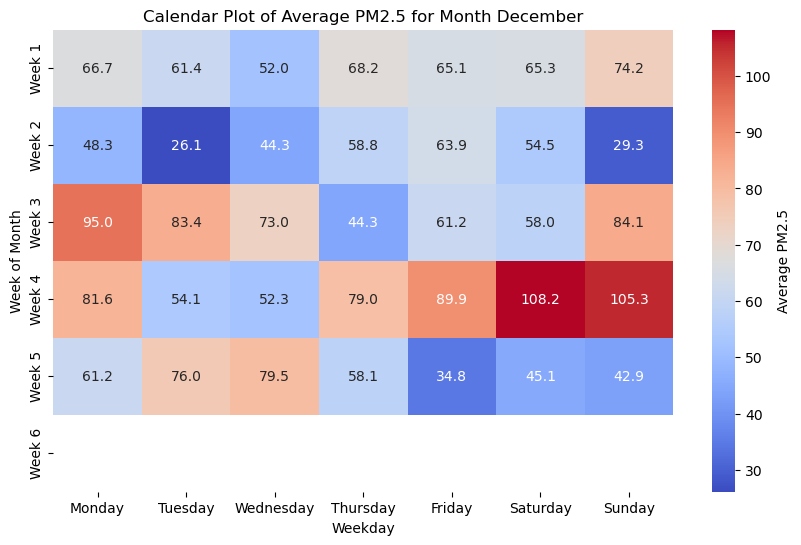

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np

df_filtered['Year'] = df_filtered['Timestamp'].dt.year
df_filtered['Month'] = df_filtered['Timestamp'].dt.month
df_filtered['Day'] = df_filtered['Timestamp'].dt.day
df_filtered['Weekday'] = df_filtered['Timestamp'].dt.weekday

df_grouped = df_filtered.groupby(['Year', 'Month', 'Day', 'Weekday'])['PM2.5'].mean().reset_index()

calendar_data = np.empty((6, 7))
calendar_data[:] = np.nan

for _, row in df_grouped.iterrows():
    month, day, weekday = int(row['Month']), int(row['Day']), int(row['Weekday'])
    week_of_month = (day - 1) // 7
    calendar_data[week_of_month, weekday] = row['PM2.5']

plt.figure(figsize=(10, 6))
sns.heatmap(calendar_data, annot=True, fmt=".1f", cmap='coolwarm', cbar=True,
            xticklabels=calendar.day_name, yticklabels=[f"Week {i+1}" for i in range(6)],
            cbar_kws={'label': 'Average PM2.5'})
plt.title(f"Calendar Plot of Average PM2.5 for Month {calendar.month_name[month]}")
plt.xlabel('Weekday')
plt.ylabel('Week of Month')
plt.show()


In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np

# Assuming you have a DataFrame called df_filtered

# Data Transformation: Extract year, month, day, and weekday from the 'Timestamp' column
df_filtered['Year'] = df_filtered['Timestamp'].dt.year
df_filtered['Month'] = df_filtered['Timestamp'].dt.month
df_filtered['Day'] = df_filtered['Timestamp'].dt.day
df_filtered['Weekday'] = df_filtered['Timestamp'].dt.weekday

# Data Grouping: Group data by 'Year', 'Month', 'Day', and 'Weekday' and calculate the mean of 'PM2.5' for each group
df_grouped = df_filtered.groupby(['Year', 'Month', 'Day', 'Weekday'])['PM2.5'].mean().reset_index()

# Create an empty 6x7 NumPy array to store calendar data and fill it with NaN values
calendar_data = np.empty((6, 7))
calendar_data[:] = np.nan

# Loop through the grouped data
for _, row in df_grouped.iterrows():
    # Extract month, day, and weekday from the row
    month, day, weekday = int(row['Month']), int(row['Day']), int(row['Weekday'])
    
    # Calculate the week of the month for the current day
    week_of_month = (day - 1) // 7
    
    # Populate the calendar_data array with the average PM2.5 value for the current day
    calendar_data[week_of_month, weekday] = row['PM2.5']

# Create a figure for the heatmap
plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn, with annotations, specific formatting, colormap, and color bar
sns.heatmap(calendar_data, annot=True, fmt=".1f", cmap='coolwarm', cbar=True,
            xticklabels=calendar.day_name, yticklabels=[f"Week {i+1}" for i in range(6)],
            cbar_kws={'label': 'Average PM2.5'})

# Set the title for the plot, dynamically including the month name
plt.title(f"Calendar Plot of Average PM2.5 for Month {calendar.month_name[month]}")

# Set labels for the x-axis and y-axis
plt.xlabel('Weekday')
plt.ylabel('Week of Month')

# Display the plot
plt.show()


KeyError: 'Year'